In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
results_df_dict = {}

for root, dirs, files in os.walk("results/"):
    for file in sorted(files):
        file_path = f"{root}{file}"
        record_name = file.split('.')[2]
        tmp_df = pd.read_parquet(file_path)
        results_df_dict[record_name] = tmp_df

In [3]:
print(results_df_dict.keys())

dict_keys(['2018_01_01_desktop', '2019_02_01_desktop', '2020_01_01_desktop', '2021_01_01_desktop', '2022_01_01_desktop', '2023_01_01_desktop'])


In [4]:
keys = list(results_df_dict.keys())
basic_stats_list = []

for i in range(len(keys)):
    try:
        unique_domains = results_df_dict[keys[i]].iloc[0]['unique_domain_count_before_filtration']
        nel_domains = results_df_dict[keys[i]].iloc[0]['nel_count_before_filtration']
        nel_correct = len(results_df_dict[keys[i]])
    except IndexError:
        unique_domains = nel_domains = nel_correct = 0

    basic_stats_list.append(dict(
        label=keys[i],
        unique_domains=unique_domains,
        nel_domains=nel_domains,
        nel_correct=nel_correct))

basic_stats_df = pd.DataFrame(basic_stats_list)

In [18]:
basic_stats_df['nel_incorrect'] = basic_stats_df['nel_domains'] - basic_stats_df['nel_correct']
basic_stats_df['not_contain_nel'] = basic_stats_df['unique_domains'] - basic_stats_df['nel_domains']
basic_stats_df['nel_percentage'] = 100/basic_stats_df['unique_domains']*basic_stats_df['nel_domains']
basic_stats_df['nel_correct_percentage'] = 100/basic_stats_df['unique_domains']*basic_stats_df['nel_correct']
basic_stats_df['nel_incorrect_percentage'] = 100/basic_stats_df['nel_domains']*basic_stats_df['nel_incorrect']
basic_stats_df['nel_incorrect_to_all_percentage'] = 100/basic_stats_df['unique_domains']*basic_stats_df['nel_incorrect']

In [19]:
basic_stats_df

,label,unique_domains,nel_domains,nel_correct,nel_incorrect,nel_percentage,nel_incorrect_percentage,not_contain_nel,nel_incorrect_to_all_percentage,nel_correct_percentage
0,2018_01_01_desktop,0,0,0,0,NaN,NaN,0,NaN,NaN
1,2019_02_01_desktop,3754384,365,355,10,0.009722,2.739726,3754019,0.000266,0.009456
2,2020_01_01_desktop,5428618,80278,80259,19,1.478793,0.023668,5348340,0.000350,1.478443
3,2021_01_01_desktop,7713702,787083,786910,173,10.203700,0.021980,6926619,0.002243,10.201457
4,2022_01_01_desktop,7495063,706390,705239,1151,9.424737,0.162941,6788673,0.015357,9.409381
5,2023_01_01_desktop,15120477,1761747,1759938,1809,11.651398,0.102682,13358730,0.011964,11.639434


<AxesSubplot: xlabel='label'>

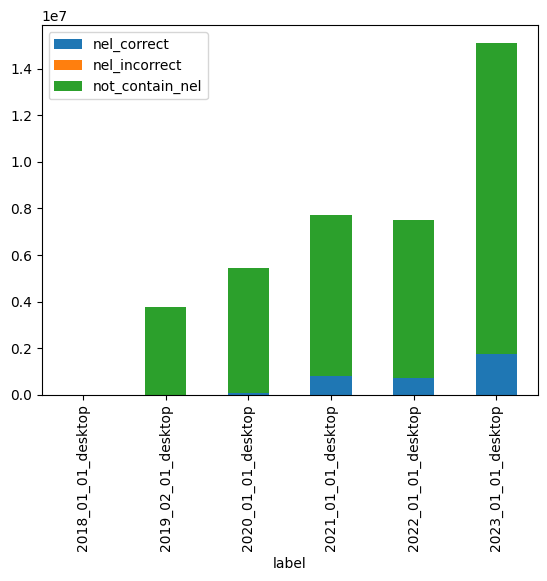

In [16]:
basic_stats_df[['label', 'nel_correct', 'nel_incorrect', 'not_contain_nel']].plot(
    kind='bar',
    x='label',
    stacked=True
)

<AxesSubplot: xlabel='label'>

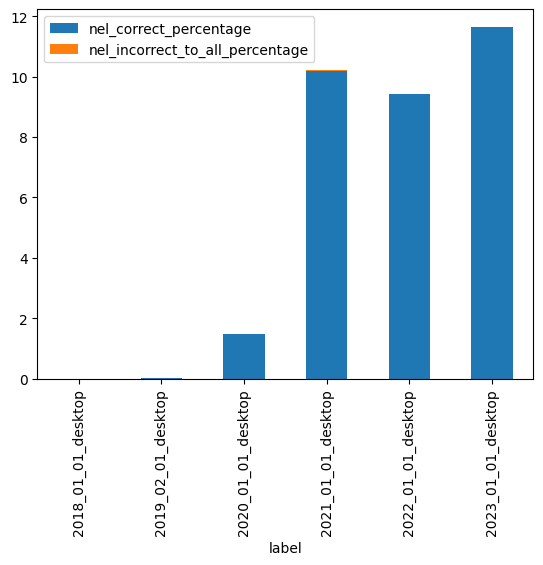

In [21]:
basic_stats_df[['label',
                #'nel_percentage',
                'nel_correct_percentage',
                #'nel_incorrect_percentage',
                'nel_incorrect_to_all_percentage'
                ]].plot(
    kind='bar',
    x='label',
    stacked=True
)
